In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

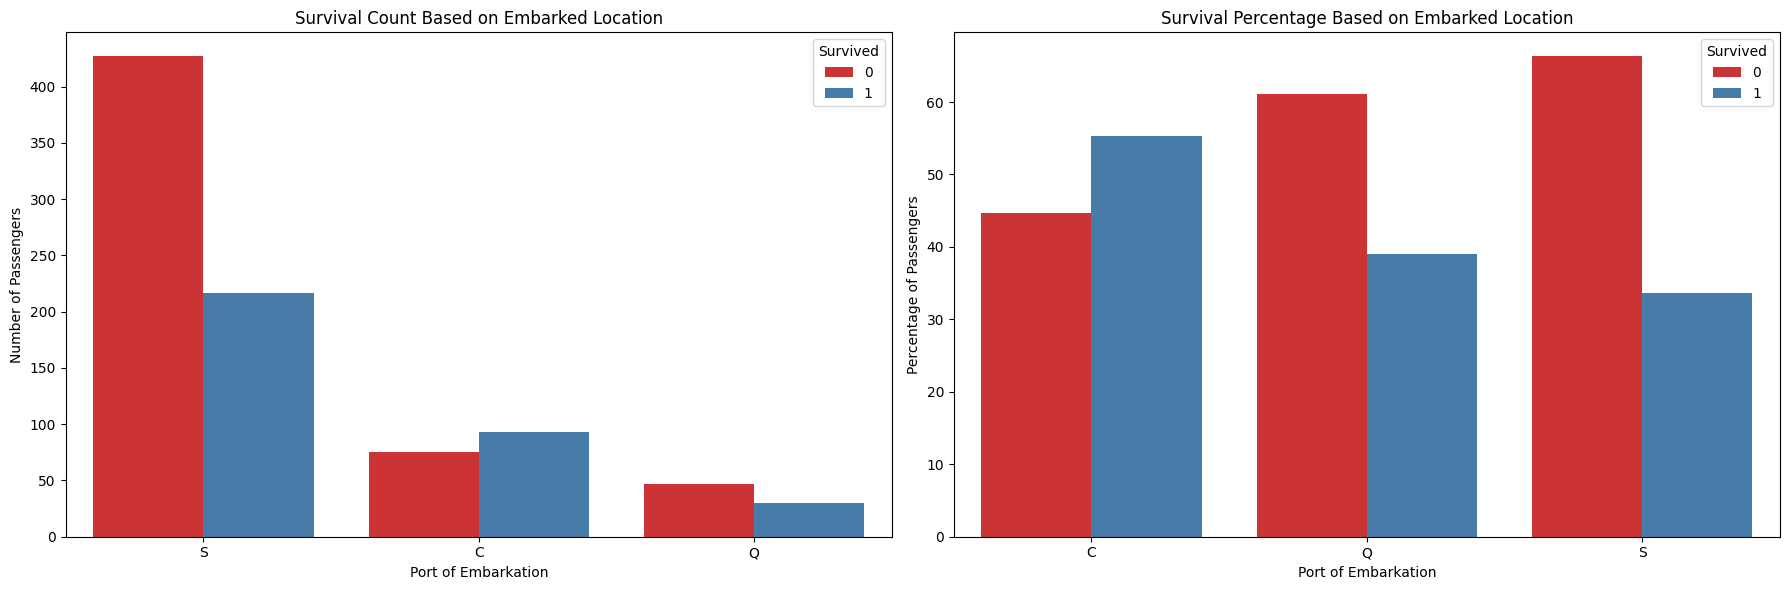

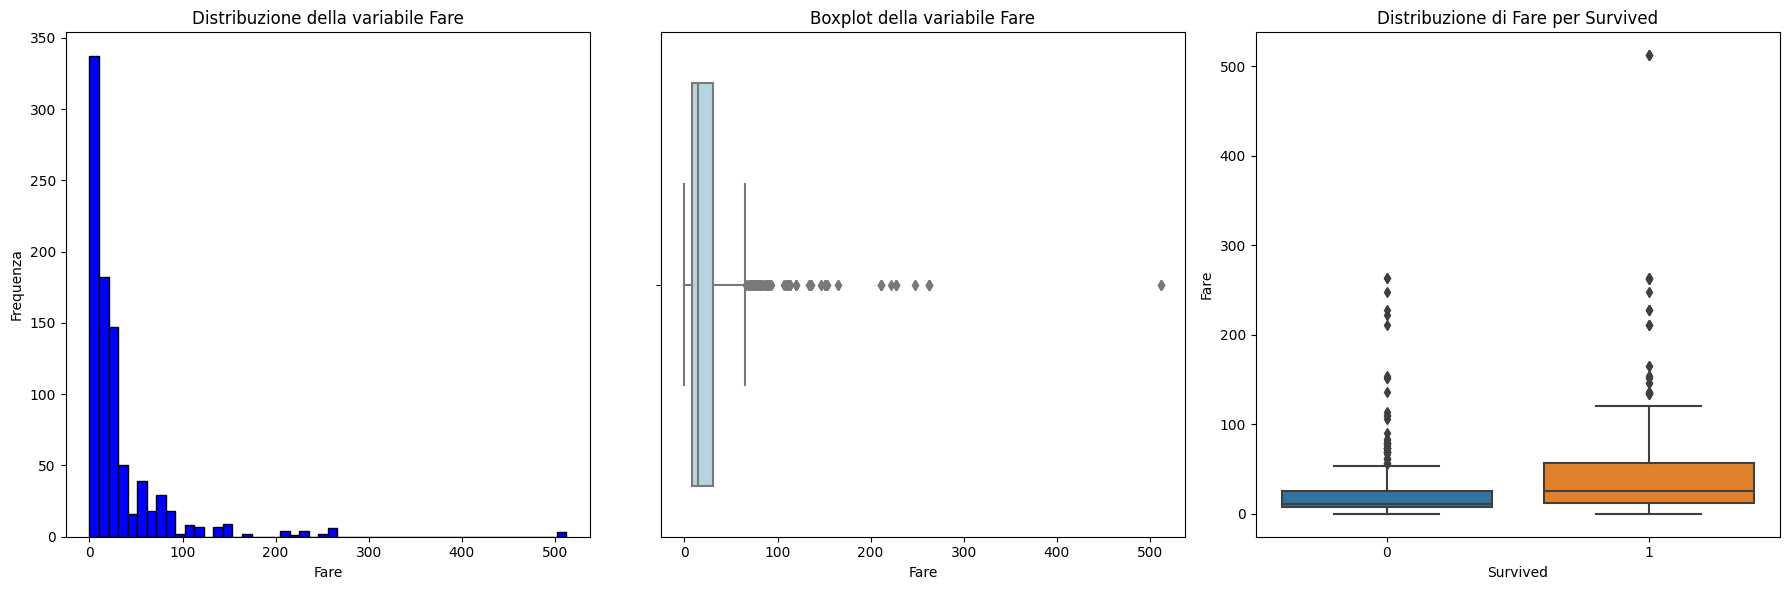

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcolare il numero di passeggeri per ciascun porto e sopravvivenza
embarked_survival_counts = train_data.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

# Calcolare le percentuali rispetto al totale dei passeggeri imbarcati in ogni porto
embarked_total_counts = train_data.groupby('Embarked')['PassengerId'].count().reset_index(name='Total')
embarked_survival_counts = pd.merge(embarked_survival_counts, embarked_total_counts, on='Embarked')
embarked_survival_counts['Percentage'] = (embarked_survival_counts['Count'] / embarked_survival_counts['Total']) * 100

# Crea una griglia di 2 grafici su una riga
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Creare un barplot per Embarked e Survived
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette='Set1', ax=axes[0])

# Aggiungere titolo e etichette
axes[0].set_title('Survival Count Based on Embarked Location')
axes[0].set_xlabel('Port of Embarkation')
axes[0].set_ylabel('Number of Passengers')

sns.barplot(data=embarked_survival_counts, x='Embarked', y='Percentage', hue='Survived', palette='Set1')

# Aggiungere titolo e etichette
axes[1].set_title('Survival Percentage Based on Embarked Location')
axes[1].set_xlabel('Port of Embarkation')
axes[1].set_ylabel('Percentage of Passengers')

# Regolazione del layout per evitare sovrapposizioni
plt.tight_layout()

# Mostrare il grafico
plt.show()


# Crea una griglia di 3 grafici su una riga
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Istogramma di Fare
axes[0].hist(train_data['Fare'], bins=50, color='blue', edgecolor='black')
axes[0].set_title('Distribuzione della variabile Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequenza')

# Boxplot di Fare
sns.boxplot(x=train_data['Fare'], color='lightblue', ax=axes[1])
axes[1].set_title('Boxplot della variabile Fare')
axes[1].set_xlabel('Fare')

# Boxplot di Fare suddiviso per Survived
sns.boxplot(x='Survived', y='Fare', data=train_data, ax=axes[2])
axes[2].set_title('Distribuzione di Fare per Survived')
axes[2].set_xlabel('Survived')
axes[2].set_ylabel('Fare')

# Regolazione del layout per evitare sovrapposizioni
plt.tight_layout()

# Visualizzazione dei grafici
plt.show()


In [4]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.fit_transform(test_data[['Age']])
test_data['Fare'] = imputer.fit_transform(test_data[['Fare']])

# Conversione della colonna "Sex"
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

#Gestione titolo
# Estrazione del titolo dal nome
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Raggruppa titoli rari
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

# Converti i titoli in numeri
train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)

#Creazione FamilySize e IsAlone feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1
test_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0
test_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1

#Creazione di AgeGroup
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# Crea le variabili dummies per 'AgeGroup'
train_data = pd.get_dummies(train_data, columns=['AgeGroup'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['AgeGroup'], drop_first=True)

#Crea le variabili dummies per 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

#Dividere la variabile Fare in Bin e Creazione variabili Dummies
train_data['FareBin'] = pd.cut(train_data['Fare'], bins=[0, 7.91, 14.454, 31, 512], 
                               labels=['Low', 'Medium', 'High', 'Very High'])
test_data['FareBin'] = pd.cut(test_data['Fare'], bins=[0, 7.91, 14.454, 31, 512], 
                               labels=['Low', 'Medium', 'High', 'Very High'])
train_data = pd.get_dummies(train_data, columns=['FareBin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['FareBin'], drop_first=True)

#GetDummies per la variabile Pclass per aiutare alcuni modelli
train_data = pd.get_dummies(train_data, columns=['Pclass'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Pclass'], drop_first=True)

# Verifica il risultato
print(train_data.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  ...  \
0    0  22.0      1      0         A/5 21171   7.2500   NaN  ...   
1    1  38.0      1      0          PC 17599  71.2833   C85  ...   
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN  ...   
3    1  35.0      1      0            113803  53.1000  C123  ...   
4    0  35.0      0      0            373450   8.0500   NaN  ...   

   AgeGroup_Adult  AgeGroup_Middle-Aged  AgeGroup_Senior  Embarked_Q  \
0            True                 False     

In [5]:
from sklearn.model_selection import train_test_split
train_data=train_data.drop(['Name','Cabin','Ticket', 'SibSp','Parch','Age','Fare'],axis=1)
test_data=test_data.drop(['Name','Cabin','Ticket', 'SibSp','Parch','Age','Fare'],axis=1)
X_val = test_data.drop(columns = ['PassengerId'])
X = train_data.drop(columns=['Survived','PassengerId'])
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

#Best parameters: {'pipe3__clf__n_neighbors': 4, 'pipe3__clf__p': 2(Non controllare più), 
#'pipe4__clf__max_depth': 5(Non controllare più), 'pipe5__clf__learning_rate': 0.05, 
#'pipe5__clf__n_estimators': 2000}

#clf1 = LogisticRegression(penalty = 'l2', C = 0.001, solver = 'lbfgs', random_state = 1, class_weight = 'balanced')
#clf2 = DecisionTreeClassifier(max_depth = 1, criterion = 'entropy', random_state = 0, class_weight = 'balanced')
clf3 = KNeighborsClassifier(n_neighbors = 4, p = 2, metric = 'minkowski')
clf4 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
clf5 = XGBClassifier(n_estimators = 2000, learning_rate =0.05, max_depth=5, random_state=42)
#pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
#pipe2 = Pipeline([['lda', LinearDiscriminantAnalysis(n_components=1)], ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],['clf', clf3]])
pipe4 = Pipeline([['sc', StandardScaler()],['lda', LinearDiscriminantAnalysis(n_components=1)], ['clf', clf4]])
pipe5 = Pipeline([['sc', StandardScaler()],['clf', clf5]])
#'Logistic regression', 'Decision Tree',
clf_labels = [ 'KNN', 'Random Forest', 'XGBoost']
print('10-fold cross validation:\n')
pipes = [pipe3,pipe4, pipe5]
for clf, label in zip(pipes, clf_labels):
    scores = cross_val_score(estimator=clf, X = X_train, y=y_train, cv=10, scoring='accuracy')
    print(f'Accuracy: {scores.mean():.2f}'
         f'(+/- {scores.std():-2f})[{label}]')

10-fold cross validation:

Accuracy: 0.79(+/- 0.047777)[KNN]
Accuracy: 0.81(+/- 0.033953)[Random Forest]
Accuracy: 0.83(+/- 0.046251)[XGBoost]


In [7]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

#'pipe1__clf__C': [0.001, 0.01, 0.1, 1],
#    'pipe2__clf__max_depth': [1, 2, 3, 5],
# Definisci il dizionario dei parametri per il tuning
param_grid = {
    'pipe3__clf__n_neighbors': [4, 6, 5, 7],
    'pipe3__clf__p':[1,2],
    'pipe4__clf__max_depth': [3, 5, 7],
    'pipe5__clf__learning_rate': [0.01, 0.02, 0.05],
    'pipe5__clf__n_estimators': [500, 1000, 2000]
}

# Crea il VotingClassifier con le pipeline
#('pipe1', pipe1), ('pipe2', pipe2),
voting_clf = VotingClassifier(estimators=[
    ('pipe3', pipe3), ('pipe4', pipe4), 
    ('pipe5', pipe5)], voting='hard')

# Inizia la ricerca grid search
grid = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_}")
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import VotingClassifier\n\n#\'pipe1__clf__C\': [0.001, 0.01, 0.1, 1],\n#    \'pipe2__clf__max_depth\': [1, 2, 3, 5],\n# Definisci il dizionario dei parametri per il tuning\nparam_grid = {\n    \'pipe3__clf__n_neighbors\': [4, 6, 5, 7],\n    \'pipe3__clf__p\':[1,2],\n    \'pipe4__clf__max_depth\': [3, 5, 7],\n    \'pipe5__clf__learning_rate\': [0.01, 0.02, 0.05],\n    \'pipe5__clf__n_estimators\': [500, 1000, 2000]\n}\n\n# Crea il VotingClassifier con le pipeline\n#(\'pipe1\', pipe1), (\'pipe2\', pipe2),\nvoting_clf = VotingClassifier(estimators=[\n    (\'pipe3\', pipe3), (\'pipe4\', pipe4), \n    (\'pipe5\', pipe5)], voting=\'hard\')\n\n# Inizia la ricerca grid search\ngrid = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\ngrid.fit(X_train, y_train)\n\nprint(f"Best parameters: {grid.best_params_}")\nprint(f"Best cross-validation accuracy: {grid.best_score_}")\n'

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Creazione del VotingClassifier con i classificatori
#('lr', pipe1), 
#    ('DTC', pipe2),
voting_clf = VotingClassifier(estimators=[    
    ('KNN', pipe3), 
    ('RF', pipe4), 
    ('XG', pipe5)], voting='hard')

# Addestramento
voting_clf.fit(X_train, y_train)

# Previsioni
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)
Majoring_vote_train = accuracy_score(y_train, y_train_pred)
Majoring_vote_test = accuracy_score(y_test, y_test_pred)
print(f'MV train/test accuracies '
      f'{Majoring_vote_train:.3f}/{Majoring_vote_test:.3f}')

predictions = voting_clf.predict(X_val)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

MV train/test accuracies 0.874/0.827
Your submission was successfully saved!
